In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crmls_last_6_months.csv", low_memory=False)

In [5]:
binary_vars = [
    'ViewYN', 'WaterfrontYN', 'BasementYN', 'PoolPrivateYN',
    'AttachedGarageYN', 'FireplaceYN', 'NewConstructionYN'
]

In [7]:
# Check missing values and value counts
for var in binary_vars:
    print(f"\n{var} value counts:")
    print(df[var].value_counts(dropna=False))


ViewYN value counts:
ViewYN
True     69365
False    43854
NaN      12323
Name: count, dtype: int64

WaterfrontYN value counts:
WaterfrontYN
NaN     125454
True        88
Name: count, dtype: int64

BasementYN value counts:
BasementYN
NaN     123491
True      2051
Name: count, dtype: int64

PoolPrivateYN value counts:
PoolPrivateYN
False    96920
NaN      15351
True     13271
Name: count, dtype: int64

AttachedGarageYN value counts:
AttachedGarageYN
True     70024
NaN      35526
False    19992
Name: count, dtype: int64

FireplaceYN value counts:
FireplaceYN
True     69789
False    44512
NaN      11241
Name: count, dtype: int64

NewConstructionYN value counts:
NewConstructionYN
False    106064
NaN       14939
True       4539
Name: count, dtype: int64


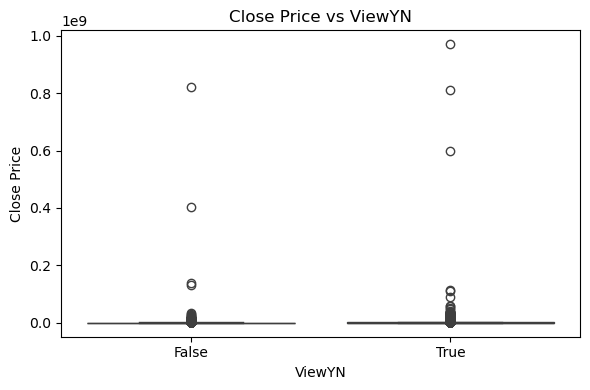

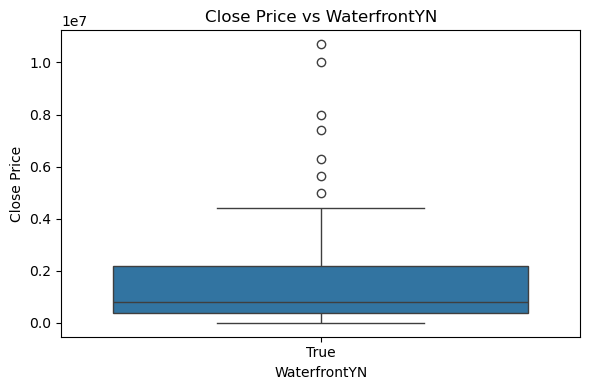

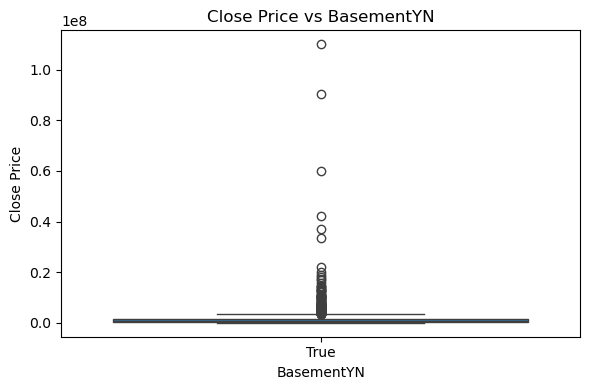

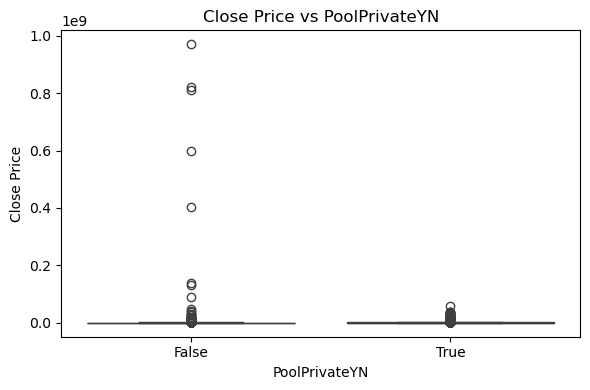

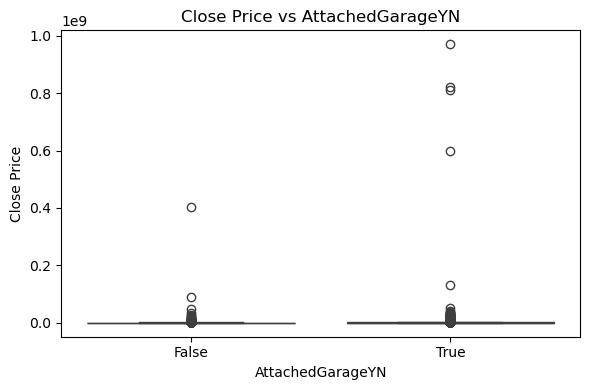

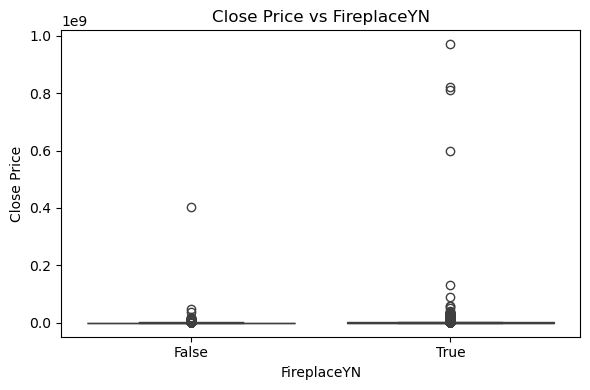

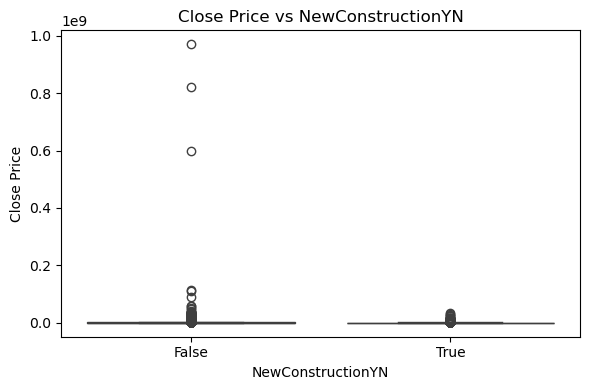

In [125]:
# Plot ClosePrice vs each binary variable
for var in binary_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[var], y=df['ClosePrice'])
    plt.title(f'Close Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Close Price')
    plt.tight_layout()
    plt.show()

In [126]:
df["HighSchoolDistrict"].unique()

array([nan, 'Other', 'Big Oak Flat-Groveland Unified', 'Burbank Unified',
       'Mendocino Unified', 'Call Listing Office',
       'William S. Hart Union', 'Livermore Valley', 'Oceanside Unified',
       'Chico Unified', 'Tustin Unified', 'Los Angeles Unified',
       'Irvine Unified', 'Torrance Unified',
       'Huntington Beach Union High', 'Desert Sands Unified',
       'Arcadia Unified', 'Laguna Beach Unified', 'Palo Alto Unified',
       'Poway Unified', 'Newport Mesa Unified', 'Atwater',
       'Riverside Unified', 'ABC Unified', 'Anaheim Union High',
       'Santa Ana Unified', 'Norwalk - La Mirada', 'Glendale Unified',
       'San Francisco Unified', 'Perris Union High',
       'South San Francisco Unified', 'Moreno Valley Unified',
       'Carlsbad Unified', 'Merced City', 'Chaffey Joint Union High',
       'Corona-Norco Unified', 'Long Beach Unified',
       'Baldwin Park Unified', 'Fullerton Joint Union High', 'Hermosa',
       'Manhattan Unified', 'Acalanes', 'Redlands Uni

In [127]:
file_path = 'RankingOfSchools.xlsx'
rank = pd.read_excel(file_path)
rank.head()

,School District,Ranking
0,Palo Alto Unified School District,1.0
1,Mountain View-Los Altos Union High School Dist...,2.0
2,San Dieguito Union High School District,3.0
3,Los Gatos-Saratoga Joint Union High School Dis...,4.0
4,Redondo Beach Unified School District,5.0


In [128]:
# Get sets of school names from both DataFrames
df1_names = set(df['HighSchoolDistrict'])
df2_names = set(rank['School District'])

# Find exact matches
exact_matches = df1_names.intersection(df2_names)

# Count results
print(f"Total in df1: {len(df1_names)}")
print(f"Total in df2: {len(df2_names)}")
print(f"Exact matches: {len(exact_matches)}")


Total in df1: 409
Total in df2: 126
Exact matches: 1


In [129]:
## The Exact Match Number is Low.

In [130]:
df['Matched District'] = df['HighSchoolDistrict']
merged_df = df.merge(rank, left_on='Matched District', right_on='School District', how='left')

In [131]:
## direct merge
merged_df

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled,Matched District,School District,Ranking
0,Glendale,Glendale,NaN,NaN,NaN,NaN,NaN,3350000.0,552665323,Listings@LockerRealty.com,...,NaN,91331,NaN,88445.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Glendale,Glendale,NaN,NaN,NaN,NaN,NaN,3350000.0,552665323,Listings@LockerRealty.com,...,NaN,91331,NaN,88445.0,NaN,NaN,NaN,NaN,NaN,NaN
2,InlandValleys,InlandValleys,NaN,True,NaN,NaN,NaN,125000.0,551977092,Patriciapandeyrealtor@gmail.com,...,NaN,92530,0.0,9148.0,NaN,NaN,NaN,NaN,NaN,NaN
3,InlandValleys,InlandValleys,NaN,True,NaN,NaN,NaN,125000.0,551977092,Patriciapandeyrealtor@gmail.com,...,NaN,92530,0.0,9148.0,NaN,NaN,NaN,NaN,NaN,NaN
4,PacificWest,PacificWest,NaN,True,NaN,NaN,NaN,300000.0,551927931,joshuacho1004@gmail.com,...,NaN,92356,0.0,6969600.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168295,NorthSanDiegoCounty,NorthSanDiegoCounty,Wood,True,NaN,NaN,False,5000.0,1008327642,MikeJonesSanDiegoRealtor@Gmail.com,...,Encinitas Union,92024,NaN,1.0,NaN,NaN,NaN,Encinitas Union,NaN,NaN
168296,Oakland,Oakland,NaN,NaN,NaN,NaN,NaN,700.0,1002448236,mike@hugheyhomes.com,...,NaN,94803,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
168297,Oakland,Oakland,NaN,NaN,NaN,NaN,NaN,700.0,1002448236,mike@hugheyhomes.com,...,NaN,94803,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
168298,LakeCounty,LakeCounty,NaN,NaN,NaN,NaN,NaN,975000.0,1001245469,jean@countryair.com,...,NaN,95453,NaN,37026.0,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# See what didn't match
unmatched = merged_df[merged_df['Ranking'].isnull()]
print("Unmatched entries:", unmatched['Matched District'].unique())

Unmatched entries: [nan 'Other' 'Big Oak Flat-Groveland Unified' 'Burbank Unified'
 'Mendocino Unified' 'Call Listing Office' 'William S. Hart Union'
 'Livermore Valley' 'Oceanside Unified' 'Chico Unified' 'Tustin Unified'
 'Los Angeles Unified' 'Irvine Unified' 'Torrance Unified'
 'Huntington Beach Union High' 'Desert Sands Unified' 'Arcadia Unified'
 'Laguna Beach Unified' 'Palo Alto Unified' 'Poway Unified'
 'Newport Mesa Unified' 'Atwater' 'Riverside Unified' 'ABC Unified'
 'Anaheim Union High' 'Santa Ana Unified' 'Norwalk - La Mirada'
 'Glendale Unified' 'San Francisco Unified' 'Perris Union High'
 'South San Francisco Unified' 'Moreno Valley Unified' 'Carlsbad Unified'
 'Merced City' 'Chaffey Joint Union High' 'Corona-Norco Unified'
 'Long Beach Unified' 'Baldwin Park Unified' 'Fullerton Joint Union High'
 'Hermosa' 'Manhattan Unified' 'Acalanes' 'Redlands Unified'
 'Capistrano Unified' 'Pasadena Unified' 'El Segundo Unified'
 'San Marcos Unified' 'Cajon Valley Union' 'Carmel Uni

In [133]:
from rapidfuzz import process, fuzz

In [134]:
# Step 1: Make sure strings are clean
df['HighSchoolDistrict'] = df['HighSchoolDistrict'].fillna('').astype(str).str.strip()
rank['School District'] = rank['School District'].fillna('').astype(str).str.strip()

In [135]:
# Step 2: Create a list of clean ranking names
ranking_names = rank['School District'].tolist()
ranking_names

['Palo Alto Unified School District',
 'Mountain View-Los Altos Union High School District',
 'San Dieguito Union High School District',
 'Los Gatos-Saratoga Joint Union High School District',
 'Redondo Beach Unified School District',
 'Palos Verdes Peninsula Unified School District',
 'Fremont Union High School District',
 'South Pasadena Unified School District',
 'Arcadia Unified School District',
 'Carmel Unified School District',
 'Pleasanton Unified School District',
 'La Canada Unified School District',
 'San Mateo Union High School District',
 'San Marino Unified School District',
 'Acalanes Union High School District',
 'Tamalpais Union High School District',
 'Piedmont City Unified School District',
 'Santa Monica-Malibu Unified School District',
 'Poway Unified School District',
 'Irvine Unified School District',
 'Oak Park Unified School District',
 'Coronado Unified School District',
 'Los Alamitos Unified School District',
 'El Segundo Unified School District',
 'Manhatta

In [136]:
# Step 3: Define a fuzzy matching function
def best_match(name, choices, threshold=85):
    if not name or name.lower() in ['other', 'call listing office', 'see remarks']:
        return None
    match = process.extractOne(name, choices, scorer=fuzz.token_sort_ratio)
    if match and match[1] >= threshold:
        return match[0]
    return None

In [137]:
# Step 4: Apply matching
df['Matched District'] = df['HighSchoolDistrict'].apply(lambda x: best_match(x, ranking_names))
df['Matched District'].head()

0    None
1    None
2    None
3    None
4    None
Name: Matched District, dtype: object

In [138]:
# Step 5: Merge to get rankings
merged = df.merge(rank, left_on='Matched District', right_on='School District', how='left')

In [139]:
merged

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled,Matched District,School District,Ranking
0,Glendale,Glendale,NaN,NaN,NaN,NaN,NaN,3350000.0,552665323,Listings@LockerRealty.com,...,,91331,NaN,88445.0,NaN,NaN,NaN,None,NaN,NaN
1,InlandValleys,InlandValleys,NaN,True,NaN,NaN,NaN,125000.0,551977092,Patriciapandeyrealtor@gmail.com,...,,92530,0.0,9148.0,NaN,NaN,NaN,None,NaN,NaN
2,PacificWest,PacificWest,NaN,True,NaN,NaN,NaN,300000.0,551927931,joshuacho1004@gmail.com,...,,92356,0.0,6969600.0,NaN,NaN,NaN,None,NaN,NaN
3,Mlslistings,Mlslistings,"Carpet,Laminate,Tile",False,NaN,NaN,NaN,800000.0,544420694,assistant@danmoskowitz.com,...,Other,95122,NaN,6418.0,NaN,NaN,NaN,None,NaN,NaN
4,LakeCounty,LakeCounty,NaN,True,NaN,NaN,NaN,21500.0,516603298,jan@zapcom.net,...,,95464,0.0,4559.0,NaN,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125537,HighDesert,HighDesert,NaN,True,NaN,NaN,NaN,2990000.0,1014021520,kim.hdrealtysource@hotmail.com,...,,92345,NaN,6969600.0,NaN,NaN,NaN,None,NaN,NaN
125538,SanDiego,SanDiego,"Carpet,Laminate,Tile",True,NaN,NaN,False,3295.0,1013198225,calrealestatedoctor@gmail.com,...,,92078,0.0,NaN,NaN,NaN,NaN,None,NaN,NaN
125539,NorthSanDiegoCounty,NorthSanDiegoCounty,Wood,True,NaN,NaN,False,5000.0,1008327642,MikeJonesSanDiegoRealtor@Gmail.com,...,Encinitas Union,92024,NaN,1.0,NaN,NaN,NaN,None,NaN,NaN
125540,Oakland,Oakland,NaN,NaN,NaN,NaN,NaN,700.0,1002448236,mike@hugheyhomes.com,...,,94803,0.0,0.0,NaN,NaN,NaN,None,NaN,NaN


In [140]:
# Step 6 (Optional): Show how many now have rankings
matched_count = merged['Ranking'].notna().sum()
total = len(df)
print(f"✅ Matched {matched_count} out of {total} entries (~{round(matched_count/total*100)}%)")

✅ Matched 47 out of 125542 entries (~0%)


In [141]:
## That's bad. Decide to add the phrase before the matching to improve the matching rate. 

In [142]:
def expand_district_name(name):
    if not isinstance(name, str) or name.strip() == '':
        return ''
    
    name = name.strip()

    # Skip known garbage entries
    if name.lower() in ['other', 'call listing office', 'see remarks', 'more than 1 district - call l/o']:
        return ''

    # If name already ends in 'School District', leave it alone
    if 'School District' in name:
        return name

    # Expand common endings
    if 'Unified' in name and 'High' not in name:
        return name + ' School District'
    elif 'Union High' in name or 'High' in name:
        return name + ' School District'
    else:
        return name + ' School District'

In [143]:
df['Expanded District'] = df['HighSchoolDistrict'].apply(expand_district_name)

In [144]:
df['Matched District'] = df['HighSchoolDistrict'].apply(lambda x: best_match(x, ranking_names))

In [145]:
df['Matched District'] = df['Expanded District'].apply(lambda x: best_match(x, ranking_names))

In [146]:
merged = df.merge(rank, left_on='Matched District', right_on='School District', how='left')

matched_count = merged['Ranking'].notna().sum()
total = len(df)
print(f"✅ Matched {matched_count} out of {total} entries (~{round(matched_count/total*100)}%)")

✅ Matched 59420 out of 125542 entries (~47%)


In [147]:
## Use the unmatched list to build a manual correction dictionary for names that are still slightly off (e.g., Irvine Unified, Tustin Unified, etc.).

In [148]:
unmatched = merged[merged['Ranking'].isna()]
top_unmatched = unmatched['HighSchoolDistrict'].value_counts().head(50)
top_unmatched.to_csv('top_unmatched.csv')

In [149]:
manual_corrections = {
    'Irvine Unified': 'Irvine Unified School District',
    'Tustin Unified': 'Tustin Unified School District',
    'Palos Verdes Peninsula Unified': 'Palos Verdes Peninsula Unified School District',
    # Add more based on unmatched list
}

In [150]:
df['Corrected District'] = df['HighSchoolDistrict'].replace(manual_corrections)
df['Corrected District'] = df['Corrected District'].apply(expand_district_name)
df['Matched District'] = df['Corrected District'].apply(lambda x: best_match(x, ranking_names))

In [151]:
## Add Similarity Score Column for Confidence Audits
def match_with_score(name, choices):
    if not isinstance(name, str) or name.strip() == '':
        return None, 0
    match = process.extractOne(name, choices, scorer=fuzz.token_sort_ratio)
    if match:
        return match[0], match[1]
    return None, 0

df[['Matched District', 'Match Score']] = df['Corrected District'].apply(
    lambda x: pd.Series(match_with_score(x, ranking_names))
)

In [152]:
## Use Keyword Token Set Matching: More forgiving than exact word order

# Define the matching function using token_set_ratio
def best_match_token_set(name, choices, threshold=85):
    if not isinstance(name, str) or name.strip() == '':
        return None
    match = process.extractOne(name, choices, scorer=fuzz.token_set_ratio)
    if match and match[1] >= threshold:
        return match[0]
    return None

In [153]:
# Apply it on expanded/cleaned district column
df['Matched District'] = df['Corrected District'].apply(lambda x: best_match_token_set(x, ranking_names))

In [154]:
# Merge with the rank dataframe
merged = df.merge(rank, left_on='Matched District', right_on='School District', how='left')

In [155]:
matched_count = merged['Ranking'].notna().sum()
total_count = len(df)

percentage = (matched_count / total_count) * 100

print(f"✅ Matched {matched_count} out of {total_count} entries (~{round(percentage, 2)}%)")

✅ Matched 68483 out of 125542 entries (~54.55%)


In [156]:
merged.head()

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled,Matched District,Expanded District,Corrected District,Match Score,School District,Ranking
0,Glendale,Glendale,NaN,NaN,NaN,NaN,NaN,3350000.0,552665323,Listings@LockerRealty.com,...,88445.0,NaN,NaN,NaN,None,,,0.0,NaN,NaN
1,InlandValleys,InlandValleys,NaN,True,NaN,NaN,NaN,125000.0,551977092,Patriciapandeyrealtor@gmail.com,...,9148.0,NaN,NaN,NaN,None,,,0.0,NaN,NaN
2,PacificWest,PacificWest,NaN,True,NaN,NaN,NaN,300000.0,551927931,joshuacho1004@gmail.com,...,6969600.0,NaN,NaN,NaN,None,,,0.0,NaN,NaN
3,Mlslistings,Mlslistings,"Carpet,Laminate,Tile",False,NaN,NaN,NaN,800000.0,544420694,assistant@danmoskowitz.com,...,6418.0,NaN,NaN,NaN,None,,,0.0,NaN,NaN
4,LakeCounty,LakeCounty,NaN,True,NaN,NaN,NaN,21500.0,516603298,jan@zapcom.net,...,4559.0,NaN,NaN,NaN,None,,,0.0,NaN,NaN


In [157]:
print(merged.columns)

Index(['BuyerAgentAOR', 'ListAgentAOR', 'Flooring', 'ViewYN', 'WaterfrontYN',
       'BasementYN', 'PoolPrivateYN', 'OriginalListPrice', 'ListingKey',
       'ListAgentEmail', 'CloseDate', 'ClosePrice', 'ListAgentFirstName',
       'ListAgentLastName', 'Latitude', 'Longitude', 'UnparsedAddress',
       'PropertyType', 'LivingArea', 'ListPrice', 'DaysOnMarket',
       'ListOfficeName', 'BuyerOfficeName', 'CoListOfficeName',
       'ListAgentFullName', 'CoListAgentFirstName', 'CoListAgentLastName',
       'BuyerAgentMlsId', 'BuyerAgentFirstName', 'BuyerAgentLastName',
       'FireplacesTotal', 'AssociationFeeFrequency', 'AboveGradeFinishedArea',
       'ListingKeyNumeric', 'MLSAreaMajor', 'TaxAnnualAmount',
       'CountyOrParish', 'MlsStatus', 'ElementarySchool', 'AttachedGarageYN',
       'ParkingTotal', 'BuilderName', 'PropertySubType', 'LotSizeAcres',
       'SubdivisionName', 'BuyerOfficeAOR', 'YearBuilt', 'StreetNumberNumeric',
       'ListingId', 'BathroomsTotalInteger', 'City', '

In [158]:
merged_clean = merged.dropna(subset=['Ranking', 'ClosePrice'])

In [159]:
# Correlation analysis
correlation = merged_clean['Ranking'].corr(merged_clean['ClosePrice'])
print(f"📊 Correlation between ClosePrice and School Ranking: {round(correlation, 3)}")

📊 Correlation between ClosePrice and School Ranking: -0.007


In [160]:
import scipy.stats as stats

In [161]:
# Linear regression (optional)
slope, intercept, r_value, p_value, std_err = stats.linregress(
    merged_clean['Ranking'], merged_clean['ClosePrice']
)
print(f"📈 Regression: ClosePrice = {round(slope, 2)} * Ranking + {round(intercept, 2)}")
print(f"R-squared: {round(r_value**2, 3)}, p-value: {p_value}")

📈 Regression: ClosePrice = -1489.12 * Ranking + 880476.36
R-squared: 0.0, p-value: 0.0645309924575996


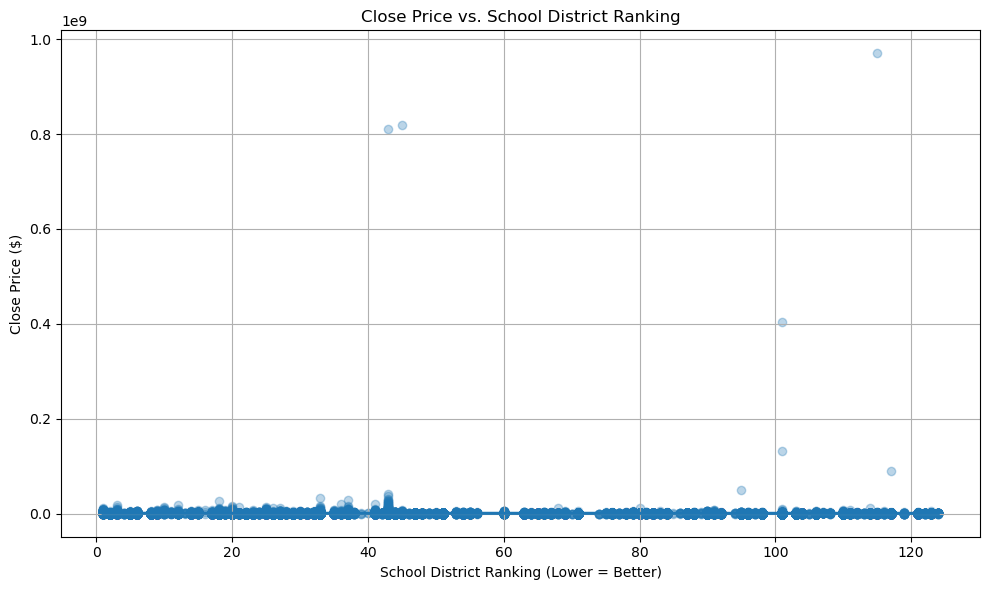

In [162]:
#  Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='Ranking', y='ClosePrice', data=merged_clean, scatter_kws={'alpha':0.3})
plt.title('Close Price vs. School District Ranking')
plt.xlabel('School District Ranking (Lower = Better)')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\sarah\AppData\Local\Temp\ipykernel_18052\3783520879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_clean['LogClosePrice'] = np.log1p(merged_clean['ClosePrice'])


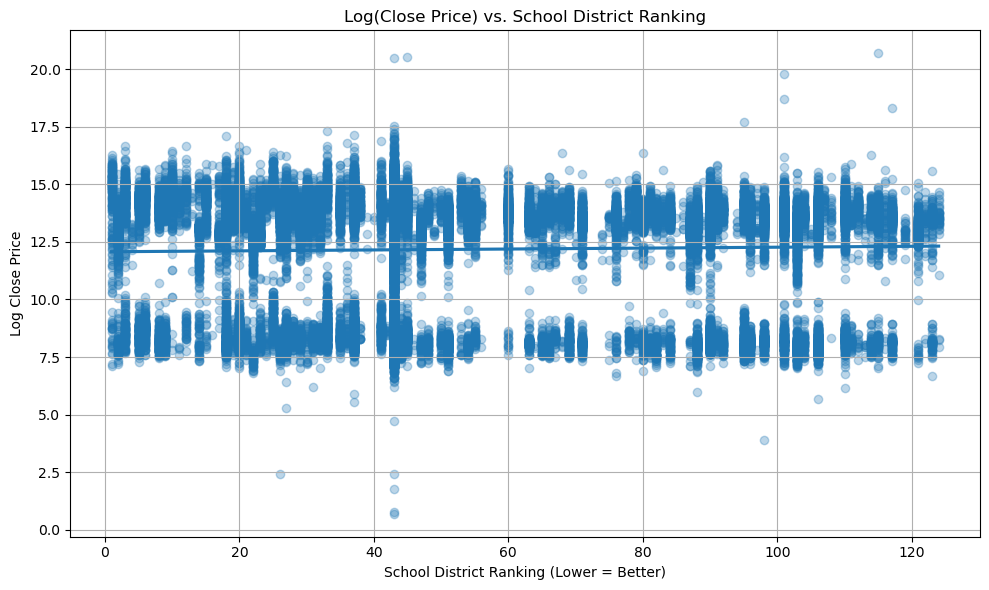

In [163]:
import numpy as np

# Add a log-transformed column (add small constant to avoid log(0))
merged_clean['LogClosePrice'] = np.log1p(merged_clean['ClosePrice'])

# Plot again with log-transformed Close Price
plt.figure(figsize=(10,6))
sns.regplot(x='Ranking', y='LogClosePrice', data=merged_clean, scatter_kws={'alpha':0.3})
plt.title('Log(Close Price) vs. School District Ranking')
plt.xlabel('School District Ranking (Lower = Better)')
plt.ylabel('Log Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [164]:
## No Obvious Trend

In [165]:
# Check the matching: 

In [166]:
matched_df = merged[merged['Ranking'].notna()]

In [167]:
# Sample 10 rows for manual review
matched_sample = matched_df[['HighSchoolDistrict', 'Matched District', 'Ranking']].sample(10, random_state=42)

# Display them
print(matched_sample)

              HighSchoolDistrict  \
97638       Desert Sands Unified   
102489          San Jose Unified   
66201       Chino Valley Unified   
67912        Los Angeles Unified   
57387      Beverly Hills Unified   
108960         Riverside Unified   
80011       Corona-Norco Unified   
29704        Los Angeles Unified   
28940                   Acalanes   
1684    Victor Valley Union High   

                                    Matched District  Ranking  
97638                    ABC Unified School District     43.0  
102489                   ABC Unified School District     43.0  
66201           Chino Valley Unified School District     96.0  
67912                    ABC Unified School District     43.0  
57387          Beverly Hills Unified School District     36.0  
108960                   ABC Unified School District     43.0  
80011           Corona-Norco Unified School District     98.0  
29704                    ABC Unified School District     43.0  
28940            Acalanes U

In [168]:
## ABC Unified School District is being over-matched (likely due to short name + high token overlap).

## Victor Valley Union High matched wrongly to Santa Ynez Valley (maybe both have "Valley" and "Union High").

In [223]:
pip install rapidfuzz

Note: you may need to restart the kernel to use updated packages.


In [225]:
manual_map = {
    'Desert Sands Unified': 'Desert Sands Unified School District',
    'San Jose Unified': 'San Jose Unified School District',
    'Los Angeles Unified': 'Los Angeles Unified School District',
    'Riverside Unified': 'Riverside Unified School District',
    'Victor Valley Union High': 'Victor Valley Union High School District',
    'Irvine Unified': 'Irvine Unified School District',
    'Tustin Unified': 'Tustin Unified School District',
    'Palos Verdes Peninsula Unified': 'Palos Verdes Peninsula Unified School District',
    'Chino Valley Unified': 'Chino Valley Unified School District',
    'Acalanes': 'Acalanes Union High School District'
}

In [227]:
def expand_district_name(name):
    if not isinstance(name, str) or name.strip() == '':
        return ''
    name = name.strip()
    if name.lower() in ['other', 'call listing office', 'see remarks', 'more than 1 district - call l/o']:
        return ''
    if 'School District' in name:
        return name
    if 'Unified' in name and 'High' not in name:
        return name + ' School District'
    if 'Union High' in name or 'High' in name:
        return name + ' School District'
    return name + ' School District'

In [229]:
df['Corrected District'] = df['HighSchoolDistrict'].replace(manual_map)
df['Corrected District'] = df['Corrected District'].apply(expand_district_name)

ranking_names = rank['School District'].dropna().astype(str).tolist()

In [239]:
def match_with_score(name, choices, threshold=95):  # was 90 before
    if not isinstance(name, str) or name.strip() == '':
        return None, 0
    match = process.extractOne(name, choices, scorer=fuzz.token_set_ratio)
    if match and match[1] >= threshold:
        return match[0], match[1]
    return None, 0

In [241]:
df[['Matched District', 'Match Score']] = df['Corrected District'].apply(
    lambda x: pd.Series(match_with_score(x, ranking_names))
)

merged = df.merge(rank, left_on='Matched District', right_on='School District', how='left')

In [243]:
merged.head()

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled,Matched District,Expanded District,Corrected District,Match Score,School District,Ranking
0,Glendale,Glendale,NaN,NaN,NaN,NaN,NaN,3350000.0,552665323,Listings@LockerRealty.com,...,88445.0,NaN,NaN,NaN,NaN,,,0.0,NaN,NaN
1,InlandValleys,InlandValleys,NaN,True,NaN,NaN,NaN,125000.0,551977092,Patriciapandeyrealtor@gmail.com,...,9148.0,NaN,NaN,NaN,NaN,,,0.0,NaN,NaN
2,PacificWest,PacificWest,NaN,True,NaN,NaN,NaN,300000.0,551927931,joshuacho1004@gmail.com,...,6969600.0,NaN,NaN,NaN,NaN,,,0.0,NaN,NaN
3,Mlslistings,Mlslistings,"Carpet,Laminate,Tile",False,NaN,NaN,NaN,800000.0,544420694,assistant@danmoskowitz.com,...,6418.0,NaN,NaN,NaN,NaN,,,0.0,NaN,NaN
4,LakeCounty,LakeCounty,NaN,True,NaN,NaN,NaN,21500.0,516603298,jan@zapcom.net,...,4559.0,NaN,NaN,NaN,NaN,,,0.0,NaN,NaN


In [249]:
# Random spot-check
matched_df = merged[merged['Ranking'].notna()]
sample_check = matched_df[['HighSchoolDistrict', 'Matched District', 'Ranking']].sample(10, random_state=43)
print(sample_check)

              HighSchoolDistrict                          Matched District  \
71186             Irvine Unified            Irvine Unified School District   
100035        San Dieguito Union   San Dieguito Union High School District   
33095        Whittier Union High       Whittier Union High School District   
23052       Corona-Norco Unified      Corona-Norco Unified School District   
90384             Clovis Unified            Clovis Unified School District   
31116   Chaffey Joint Union High  Chaffey Joint Union High School District   
104104                    Upland            Upland Unified School District   
107302         San Diego Unified         San Diego Unified School District   
73456                   Murrieta   Murrieta Valley Unified School District   
17815       Corona-Norco Unified      Corona-Norco Unified School District   

        Ranking  
71186      20.0  
100035      3.0  
33095      84.0  
23052      98.0  
90384      64.0  
31116      71.0  
104104    117.0

In [ ]:
## Check the matching percentage

In [251]:
# Total number of rows
total = len(df)

# Number of rows where ranking was successfully matched (i.e., not null)
matched = merged['Ranking'].notna().sum()

# Calculate percentage
percentage = (matched / total) * 100

# Print result
print(f"✅ Matched {matched} out of {total} entries (~{round(percentage, 2)}%)")

✅ Matched 36276 out of 125542 entries (~28.9%)


In [255]:
merged_clean = merged.dropna(subset=['Ranking', 'ClosePrice']).copy()

In [259]:
import numpy as np
from scipy.stats import linregress

In [261]:
corr = merged_clean['Ranking'].corr(merged_clean['ClosePrice'])
slope, intercept, r_value, p_value, std_err = linregress(merged_clean['Ranking'], merged_clean['ClosePrice'])

In [263]:
corr = merged_clean['Ranking'].corr(merged_clean['ClosePrice'])
slope, intercept, r_value, p_value, std_err = linregress(merged_clean['Ranking'], merged_clean['ClosePrice'])

In [265]:
print(f"📊 Correlation: {round(corr, 3)}")
print(f"📈 Regression: ClosePrice = {round(slope, 2)} * Ranking + {round(intercept, 2)}")
print(f"R²: {round(r_value**2, 3)} | p-value: {p_value:.4f}")

📊 Correlation: -0.014
📈 Regression: ClosePrice = -3311.38 * Ranking + 1138950.6
R²: 0.0 | p-value: 0.0087


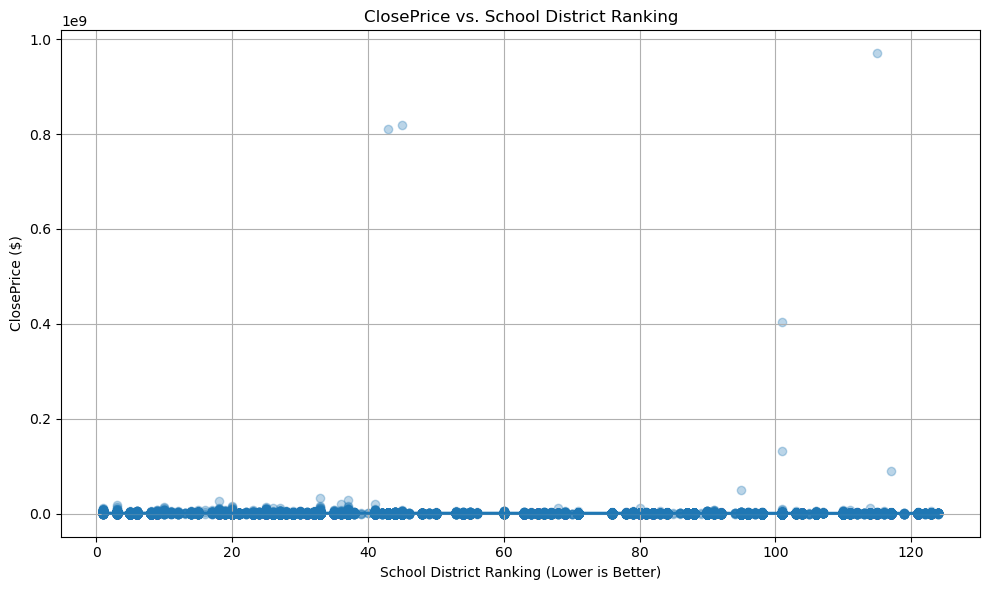

In [267]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Ranking', y='ClosePrice', data=merged_clean, scatter_kws={'alpha': 0.3})
plt.title('ClosePrice vs. School District Ranking')
plt.xlabel('School District Ranking (Lower is Better)')
plt.ylabel('ClosePrice ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

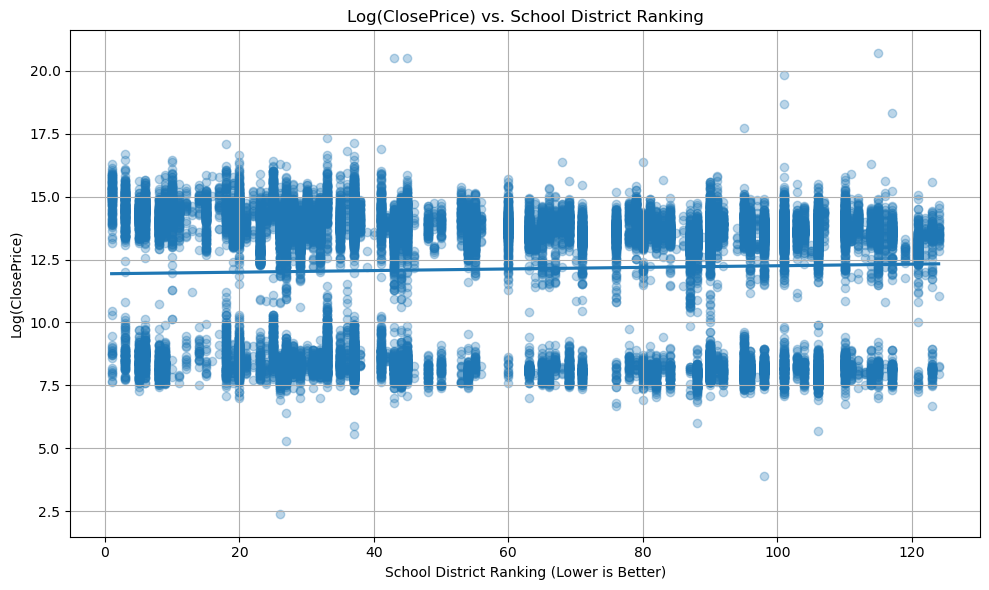

In [269]:
merged_clean['LogClosePrice'] = np.log1p(merged_clean['ClosePrice'])

plt.figure(figsize=(10, 6))
sns.regplot(x='Ranking', y='LogClosePrice', data=merged_clean, scatter_kws={'alpha': 0.3})
plt.title('Log(ClosePrice) vs. School District Ranking')
plt.xlabel('School District Ranking (Lower is Better)')
plt.ylabel('Log(ClosePrice)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
## Clean the Variables

In [9]:
df.head()

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
0,Glendale,Glendale,NaN,NaN,NaN,NaN,NaN,3350000.0,552665323,Listings@LockerRealty.com,...,NaN,False,0.0,NaN,91331,NaN,88445.0,NaN,NaN,NaN
1,InlandValleys,InlandValleys,NaN,True,NaN,NaN,NaN,125000.0,551977092,Patriciapandeyrealtor@gmail.com,...,NaN,False,NaN,NaN,92530,0.0,9148.0,NaN,NaN,NaN
2,PacificWest,PacificWest,NaN,True,NaN,NaN,NaN,300000.0,551927931,joshuacho1004@gmail.com,...,NaN,False,NaN,NaN,92356,0.0,6969600.0,NaN,NaN,NaN
3,Mlslistings,Mlslistings,"Carpet,Laminate,Tile",False,NaN,NaN,NaN,800000.0,544420694,assistant@danmoskowitz.com,...,NaN,False,0.0,Other,95122,NaN,6418.0,NaN,NaN,NaN
4,LakeCounty,LakeCounty,NaN,True,NaN,NaN,NaN,21500.0,516603298,jan@zapcom.net,...,NaN,False,NaN,NaN,95464,0.0,4559.0,NaN,NaN,NaN


In [11]:
features = ['NewConstructionYN', 'GarageSpaces', 'HighSchoolDistrict', 
            'PostalCode', 'LotSizeSquareFeet']

na_percent = df[features].isna().mean() * 100
print("Percentage of missing values in each feature:")
print(na_percent)

Percentage of missing values in each feature:
NewConstructionYN     11.899603
GarageSpaces          13.421803
HighSchoolDistrict    34.058721
PostalCode             0.023100
LotSizeSquareFeet      8.843256
dtype: float64


In [13]:
# 1. New Construction
# If NA means "not new construction" in context, replace NA with False. Cause if it is a new constuction, it should be actively posted online.
df['NewConstructionYN'] = df['NewConstructionYN'].fillna(False)

C:\Users\sarah\AppData\Local\Temp\ipykernel_4588\3581258723.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['NewConstructionYN'] = df['NewConstructionYN'].fillna(False)


In [15]:
# 2. Garage Space: NA probably means 0 garage spaces. Due to the same reason above.
# e.g. condo, older house 
df['GarageSpaces'] = df['GarageSpaces'].fillna(0)

In [ ]:
# Doesn't matter for high school district or postal code - we already have longitude and latitude to fill

In [17]:
df['PostalCode'] = df['PostalCode'].fillna('Unknown')

In [19]:
# check for negative values
for col in ['GarageSpaces', 'LotSizeSquareFeet']:
    neg_count = (df[col] < 0).sum()
    print(f"{col}: {neg_count} negative values")

GarageSpaces: 0 negative values
LotSizeSquareFeet: 0 negative values


In [21]:
# remove outliers
# check the percentage outside of 1.5 IQR
for col in ['GarageSpaces', 'LotSizeSquareFeet']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((df[col] < lower) | (df[col] > upper)) & (~df[col].isna())
    outlier_pct = outliers.mean() * 100
    print(f"{col}: Would remove {outlier_pct:.2f}% as outliers using 1.5*IQR")

GarageSpaces: Would remove 0.44% as outliers using 1.5*IQR
LotSizeSquareFeet: Would remove 14.42% as outliers using 1.5*IQR


In [23]:
# good for garage spaces but not for lot size
# remove for garage 
col = 'GarageSpaces'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df = df[df[col].isna() | ((df[col] >= lower) & (df[col] <= upper))]

In [25]:
# check the upper bound
large_lots = (df['LotSizeSquareFeet'] > 20000).sum()
print(f"Number of homes with lot size > 20,000 sqft: {large_lots} ({large_lots / len(df) * 100:.2f}%)")

Number of homes with lot size > 20,000 sqft: 20850 (16.68%)


In [27]:
# For general California housing analysis, keep only homes with LotSizeSquareFeet ≤ 20,000 sqft
df_cleaned = df[df['LotSizeSquareFeet'].isna() | (df['LotSizeSquareFeet'] <= 20000)]

In [29]:
# and we can have the higher threshold for the higher cluster

In [33]:
# final result
df_cleaned[features]

,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,LotSizeSquareFeet
1,False,0.0,NaN,92530,9148.0
3,False,0.0,Other,95122,6418.0
4,False,0.0,NaN,95464,4559.0
6,False,0.0,NaN,92354,5000.0
9,False,0.0,NaN,93446,8002.0
...,...,...,...,...,...
125532,False,0.0,NaN,94509,871.2
125533,False,0.0,NaN,95467,10179.0
125538,False,2.0,NaN,92078,NaN
125539,False,1.0,Encinitas Union,92024,1.0
